To start a SAS Academic session, run:

In [1]:
import saspy
my_session = saspy.SASsession()

Using SAS Config named: oda
Pandas module not available. Setting results to HTML
SAS Connection established. Subprocess id is 30773



You can then type SAS commands. "The %%SAS magic enables you to submit the contents of a cell to your SAS session. The cell magic executes the contents of the cell and returns any results."

In [5]:
%%SAS my_session
proc print data=sashelp.class;
run;

data work.a;
  set sashelp.cars;
run;

'Invalid SAS Session object supplied'

## Probability
Probability is the long-run relative frequency. That is, if we take sample after sample, what proportion do we see in the long run? Suppose we flip a coin 10 times. If we define event $A$ as flipping a head, then the probability of A, $P(A)$, is defined as
$$
P(A) \approx \frac{\text{# of heads}}{10}
$$

With 6 heads and 10 coin flips, our probability would be $6/10 = 0.6$. Our goal is to do prediction and inference, which requires the study of **random variables (RVs)** and the probabilities of different values in these random variables. Random variables are usually denoted with capital letters (Y, X, W, Z, $\bar{Y}, S)$ and they measure how observations vary within a variable (i.e. how observations in a particular column vary from one to another). Outcomes that a random variable can take on are called the **support** and individual outcomes of a random variable are denoted with lowercase letters (y, x, w, z, $\bar{y}, s). We want to study the pattern (the frequency) of these variables. Moreover, if we could measure everyone, we would know the **population distribution** of the random variable. 

However, since we cannot speak with everyone, we will study samples and make _inferences_ about everyone. Usually, we care about the distribution of a statistic (such as $\bar{x}$ or sample proportions), and the distribution of _many_ $\bar{x}$ or sample proportions would be called the **sampling distribution**. 

**Bank example**
* The _population_ is all of the customers at a bank
* Parameter $p$ is the proportion of customers willing to open an additional account
* The _sample_ consists of observations of 40 independent customers
* The _statistic_ is the (observed) _sample_ proportion, $\hat{p} = \frac{8}{40} = 0.2 = 20\%$

Is the _population_ proportion greater than 0.15? If so, the bank can make money with the new accounts. But, can we assume that _one sample_ with a statistic of 20% is enough? How do we use probability to answer this?

Assume that $p=0.15$ is the truth (i.e. exactly 15% of people would open a new account if given the opportunity). Our first sample gave us a statistic of $\hat{p} = \frac{8}{40} = 0.2 = 20\%$, but what if took another sample of 40 individuals, and another, and another? If we knew the distribution of $\hat{p}$ when $p=0.15$, then we could use probability to make a decision.

<center><img src="smoothed_distribution.png" style="width:1000px"/></center>

We can use software to run this simulation many times (Monte Carlo Approximation), assuming that $p=0.15$ is the truth and that we observe 40 new customers each time. With this, where does our value (8/40) fall in the realm of all possible values?
$$
P(\hat{p} \ge \frac{8}{40}) \approx \frac{\text{# of observed } \hat{p} \ge \frac{8}{40}}{\text{Total # of simulations}}
$$

After 10,000 simulations, and assuming that $p$ is trully 0.15, I can randomly get a sample of $0.2$ or higher approximately $24.6\%$ of the time. This histogram of sample proportions is an approximation to the sampling distribution of the sample proportion. It is what we need to find probabilities and conduct inference. 
<center><img src="monte_carlo.png" style="width:600px"/></center>

# Discrete random variables
We can list out the outcomes (e.g. the number of cars going through an intersection in an hour). Y has support 0, 1, 2, 3,...

We can describe the distribution of a discrete random variable in a variety of ways:
* Probability table
  <center><img src="probability_table.png" style="width:400px"/></center>
* Probability Mass Function (PMF) (pick a point and the PDF shows the probability of that point)
  <center><img src="pmf.png" style="width:400px"/></center>
* Probability histogram
  <center><img src="probability_histogram.png" style="width:400px"/></center>
* Cumulative Distribution Function (CDF) (probability is **less than or equal to** a specific outcome)
  <center><img src="cdf.png" style="width:600px"/></center>
  <center><img src="cdf_visual.png" style="width:400px"/></center>

## Complement rule
$P(A)+P(A^C)=1$. Therefore, 
$$
P(Y \gt 1) = 1 - P(Y \le 1) \\
P(Y \ge 1) = 1 - P(Y \lt 1)
$$

As an example, for a _discrete_ distribution,
$$
P(Y \ge 8) = 1 - P(Y \lt 8) = 1 - P(Y \le 7)
$$

This becomes a CDF calculation! 

## Expected values
The population mean (or average) **measures center** (i.e. the $y$ value where the distribution "balances").
$$
\text{Population mean = } \mu = E(Y) = \Sigma_{support} yp(y)
$$
$\mu\$ is the average value of the RV we would get if we did an experiment again and again. 
<center><img src="expected_value.png" style="width:600px"/></center>

The population variance (and standard deviation) measure **spread**.
$$
\sigma^2 = \text{Var(Y)} = E[(Y-\mu)^2] = E(Y^2)-[E(Y)]^2 \\
\sqrt{\sigma^2} = \sigma = \text{SD(Y)}
$$

## Common discrete random variable distributions
<center><img src="discrete_named_distributions.png" style="width:800px"/></center>

### Bernoulli distribution
We have trials with one observation with a binary outcome: success ($X=1$) or failure ($X=0$). The Probability Mass Function (PMF) is

$$
p(x) = P(X=x) = \left\{
\begin{array}{ll}
      p, & \text{if } x=1 \\
      1-p, & \text{if } x=0 \\
      0, & \text{otherwise} \\
\end{array} 
\right.
$$

If we have a Bernoulli random variable, then the expected value and the variance are
$$
X \sim Ber(p) \\
E(X) = p \\
Var(X) = p(1-p)
$$

<div class="alert alert-block alert-success">
<b>Tip:</b> When you see something like $X \sim Ber(p)$, the tilde is read as "is distributed". This is a shorthand way of describing the distribution of the random variable! We would read this as "X is distributed as a Bernoulli random variable with parameter p". 
</div>


### Binomial distribution
We look for a success or a failure in many observations (as opposed to a Bernoulli trial, which only looks at a success or failure in one observation). With a binomial distribution, we are trying to count the number of successes.
* Assume that individuals or trials are independent
  * For instance, the probability of getting heads or tails when flipping a coin does not depend on the outcome of the previous flip
* Assume that the number of trials if fixed
* Each trial has one of two discrete outcomes - success or failure 
  * For instance, $Y$ counts the number of successes, such as the number of heads when flipping a coin
* The probability of success on each trial is _constant_
  * For example, all individuals have the same probability $p$ of opening a new account

Most observations fall between $Mean - 2\sigma$ and $Mean + 2\sigma$. For any distribution with a mean and a variance, at least 75% of the distribution falls within 2 standard deviations of the mean.

For three individuals, $X_{1},X_{2},X_{3}$,

$$
Y \sim Bin(3,p)\\
p(y) = P(Y=y) = \left\{
\begin{array}{ll}
      \begin{pmatrix} 3 \\ y \end{pmatrix} p^y(1-p)^{3-y}, & \text{y = 0,1,2,3 } \\
      0, & \text{otherwise} \\
\end{array} 
\right.
$$

More generally, we can have an arbitrary fixed number $n$ of independent trials, with with a probability $p$ of success. If $Y$ is the number of _successes_, then

$$
Y \sim Bin(n,p) \\
p(y) = P(Y=y) = \begin{pmatrix} n \\ y \end{pmatrix} p^y(1-p)^{n-y} \text{ for y = 0,1,...,n} \\
E(Y) = np \\
E(X+Y) = E(X)+E(Y) \\
Var(Y) = np(1-p)
$$

A sample binomial with 40 independent trials, each with a probability of success of 0.15, will have, on average, 6 successes and a variability of 2.26 around those successes.
<center><img src="sample_binomial.png" style="width:400px"/></center>

As an example, for a _discrete_ distribution,
$$
P(Y \ge 8) = 1 - P(Y \lt 8) = 1 - P(Y \le 7)
$$

This becomes a CDF calculation! In SAS, the PROBBNML function gives us the CDF of the binomial distribution. For p=0.15, a sample size of 40, and a probability less than or equal to 7:

In [6]:
%%SAS my_session
DATA Binomial;
  PROB = 1 - PROBBNML(0.15,40,7);
RUN;

PROC PRINT DATA = Binomial;
RUN;

Obs,PROB
1,0.24407



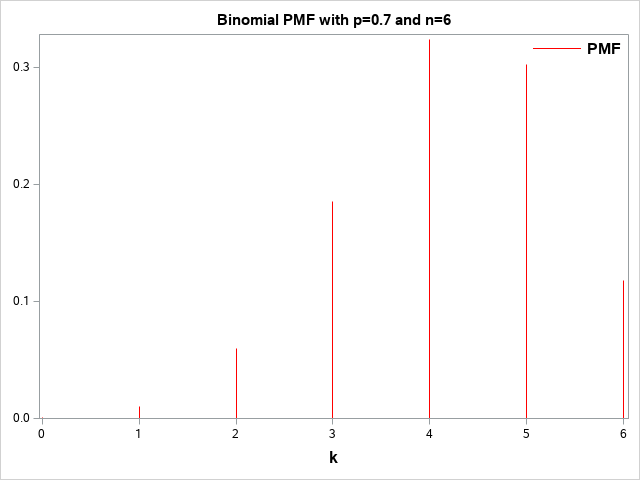

In [6]:
%%SAS my_session
/* https://sasnrd.com/sas-binomial-distribution/ */
/* Generate PMF Data */
/* Based on Khan Academy example of basketball freethrows where
probability of scoring is 0.7 and the number of trials is 6 */
%let p=0.7;
%let n=6;
data Bino_PMF;
   do k=0 to &n;
      PMF=pdf('Binomial', k, &p, &n);
      output;
   end;
run;
 
/* Plot PMF */
title "Binomial PMF with p=&p and n=&n";
proc sgplot data=Bino_PMF noautolegend;
   needle x=k y=PMF / lineattrs=(color=red);
   xaxis values=(0 to 6) label='k' labelattrs=(size=12 weight=Bold);
   yaxis display=(nolabel);
   keylegend / position=NE location=inside across=1 noborder valueattrs=(Size=12 Weight=Bold);
run;
title;

On a calculator, the probability of making 4 out of 7 freethrows, where we have a 0.35 probability of making a freethrow, can be found using the $binompdf(7,0.35,4)=0.14$ function. For a probability of making less than 5 freethrows, we can use $P(X \le 4)$ and calculate using the function $binomcdf(7,0.35,4)=0.94$ function.

**Quiz**

Q. What does a binomial random variable measure?

A. # of successes in a fixed number of Bernoulli trials

## Poisson distribution
The poisson distribution counts the number of times something occurs in a fixed period or a fixed space. If $Y$ is the number of occurrences in a fixed time or space, and $\lambda$ is a parameter that represents the _mean_ number of occurrences, then

$$
Y \sim Poi(\lambda) \\
p(Y) = P(Y=y) = \frac {\lambda^ye^{-\lambda}}{y!}, y=0,1,2,...\\
E(Y) = \lambda \\
Var(Y) = \lambda
$$

We want to work with CDF values with software.

$$
P(15 \le Y \le 20) = P(Y \le 20) - P(Y \le 14) = F(20) - F(14) \\
= 0.1961 - 0.0136 \\
= 0.1824
$$

In SAS, we can provide the mean (e.g. 24.8) and the points of interest to calculate the probability.

In [7]:
%%SAS my_session
DATA Poisson;
  PROB = POISSON(24.8, 20) - POISSON(24.8, 14);
RUN;

PROC PRINT DATA = Poisson;
RUN;

Obs,PROB
1,0.18244


## Geometric distribution
Differs from the binomial distribution in that there is no fixed number of trials. With a binomial distribution, $X$ may count the number of 6s after 12 rolls of a a fair dice. With a geometric distribution, $Y$ may count the number of rolls _until_ we get a 6 on a fair dice. "After 12" indicates a fixed number of trials with a binomial, "until 12" indicates that the maximum number of trials is indeterminable and the distribution is therefore geometric. 

### Example of a geometric distribution
$X$ is the number of rolls until we get a "1". The probability of rolling it is $\frac{1}{6}$, the probability of not rolling it is $\frac{5}{6}$.

$$
P(X=1) = \frac{1}{6} \\
P(X=2) = (\frac{5}{6})(\frac{1}{6}) \\
P(X=3) = (\frac{5}{6})(\frac{5}{6})(\frac{1}{6}) 
$$

Moreover, the mean is given by $\mu_{X} = \frac{1}{p}$. In this case, $\mu_{X} = \frac{1}{\frac{1}{6}} = 6$, suggesting that it will take an average of 6 rolls to get a "1". The standard deviation of a geometric distribution is given by $\sigma = \frac{\sqrt{1-p}}{p}$. In this case, $\sigma = \frac{\sqrt{1-\frac{1}{6}}}{\frac{1}{6}}$ = $6\sqrt{\frac{5}{6}} \approx 5.5$. The plot is a classic right skew, and can be viewed in SAS as follows.



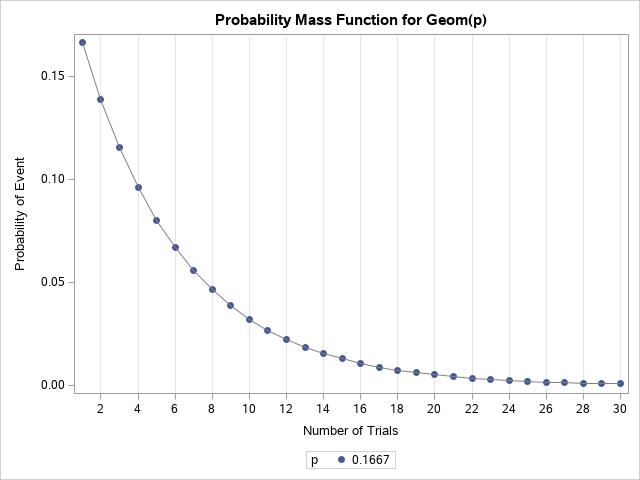

In [5]:
%%SAS my_session
/* https://blogs.sas.com/content/iml/2020/04/06/geometric-distribution-sas.html */
data Geometric;
do p = 1/6;
   /* We want the probability that the event occurs on the n_th trial.
      This is the same as the probability of n-1 failure before the event. */
   do n = 1 to 30;                     
      pdf = pdf("Geometric", n-1, p);  /* probability that event occurs on the n_th trial */
      cdf = cdf("Geometric", n-1, p);  /* probability that event happens on or before n_th Trial*/
      output;
   end;
end;
run;
 
title "Probability Mass Function for Geom(p)";
proc sgplot data=Geometric;
   scatter x=n y=pdf / group=p markerattrs=(symbol=CircleFilled);
   series  x=n y=pdf / group=p lineattrs=(color=Gray);
   label n="Number of Trials" pdf="Probability of Event";
   xaxis grid integer values=(0 to 30 by 2) valueshint;
run;

# Continuous random variables
Continuous variables take on any value in an interval; that is, their support is (0,$\infty$). To summarize the distribution of continuous variables, we commonly summarize center and spread. 
* Population average (mean), or the expected value, **measures center**
$$
\mu = E(Y) = \int_{-\infty}^\infty yf(y)dy
$$
$\mu$ is the average value of the random variables we would get if we repeated the experiment again and again. With discrete random values, we multiplied values by their probabilities and summed them. With continuous variables, since each individual value has a probability of 0, we take the value of _y_ and multiply it by its density value, f(y). "y times f(y), integrated from negative infinity to infinity".
* Population variance (and standard deviation) **measure spread**. Standard deviation, which is the square root of variance, is in the units of our random variable and is often easier to interpret. It can be thought of as the average distance from the mean).
$$
\sigma^2 = \text{Var(Y)} = E[(Y-\mu)^2] = E(Y^2)-[E(Y)]^2 \\
\sqrt{\sigma^2} = \sigma = \text{SD(Y)}
$$
* We cannot assign a probability to any individual value (with an infinite number of fractional values, we cannot say that any one has a probability). 
* To describe their distributions, we need to look at the Probability Density Function (PDF) and the Cumulative Distribution Function (CDF).

### PDF = f(y)
PDF = f(y) = smoothed curve that shows the "relative likelihood" of observing y; where the curve is higher, the tiny interval of values is more likely (even though every single value has probability 0). Probabilities in a PDF correspond to the **area under a curve** (more than the height of a single bar) and the total area under the curve must equal 1. 
    <center><img src="continuous_pdf.png" style="width:400px"/></center>
    <center><img src="continuous_pdf_2.png" style="width:400px"/></center>
    The value of the shaded blue area is the probability of us getting a value between 5 and 10 (i.e. the probability of us spending between 5-10 minutes reading a news article). Mathematically, this area is found using integration. 
    $$
    P(a \lt Y \lt B) = \int_a^b f(y)dy
    $$
    Individual PDF values can be larger than 1, but the total area under the curve must be 1.

#### Example
Consider a continuous random variable _X_ that denotes the time a person waits for an elevator to arrive. The PDF of _X_ is given by
$$
f(x) = \left\{
\begin{array}{ll}
      x, & \text{for } 0 \le x \le 1 \\
      2-x, & \text{for } 1 \lt x \le 2 \\
      0, & \text{otherwise} \\
\end{array} 
\right.  
$$

The expected value of _X_, _E(X)_, is therefore
$$
E(X) = \int_0^1 x\cdot xdx + \int_1^2 x\cdot(2-x)dx = \int_0^1 x^2dx + \int_1^2 (2x-x^2)dx = \frac{1}{3} + \frac{2}{3} = 1
$$
Thus, we expect that a person will wait an average of 1 minute for the elevator.

### CDF = F(y)
The CDF is also an integral, but rather than being between two values, it is the probability that Y is _less than or equal to_ some value _k_.
    $$
    P(Y \le k) = \int_{-\infty}^k f(y)dy
    $$   

### PDF vs. CDF 
$$
P(Y \le 6) = \int_0^6 f(y)dy = 0.7898
$$
<center><img src="pdf_vs_cdf.png" style="width:800px"/></center>

6 is the **0.79 quantile** or the **79th percentile** of the data, so 79% of our data is below 6. Other quantiles of interest include
* Q1 = 1st quartile = 0.25 quantile = 25th percentile
* Median = 0.5 quantile or 50th percentile. 50% of values are above our median and 50% of values are below our median, which gives us a good measure of center.
* Q3 = 2nd quartile = 0.75 quantile = 75th percentile

### Named continuous distributions
<center><img src="continuous_distributions.png" style="width:800px"/></center>

#### Uniform distribution
Comparable to its discrete random variable counterpart. Every value between _a_ and _b_ is equally likely.  
$$
Y \sim Unif(a,b) \text{ or } Y \sim U(a,b) \\
f(y) = \frac{1}{b-a}, \text{ for } a \lt y \lt b \\
E(Y) = \frac{a+b}{2} \text{ (the average of a and b)}\\
Var(Y) = \frac{(b-a)^2}{12} \\
$$

$Y\sim U(0,1)$ is called the **standard uniform distribution**.

**Example uniform distributions**

_Example 1_:

<center><img src="example_uniform.png" style="width:800px"/></center>

_Example 2_:

Suppose the time it takes to "Find Waldo" is _equally likely_ to be anywhere from 0 to 60 seconds. Define Y as the time it takes to "Find Waldo". 
$$
Y \sim U(0,60) \\
f(y) = \frac{1}{60} \text{ for } 0 \lt y \lt 60 \\
E(Y) = \frac{a+b}{2} = \frac{0+60}{2} = 30 \\
Var(Y) = \frac{(b-a)^2}{12} = \frac{(60-0)^2}{12} = 300
$$

What is the probability of finding Waldo between 40 and 60 seconds?
<center><img src="waldo_pdf.png" style="width:400px"/></center>
$$
P(40 \lt Y \lt 60) = \int_{40}^{60} f(y)dy = \int_{40}^{60} \frac{1}{60}dy = \frac{1}{3} = 0.33
$$

We can also use the CDF instead. 
<center><img src="waldo_cdf.png" style="width:400px"/></center>
$$
P(40 \lt Y \lt 60) \\
= P(Y \lt 60) - P(Y \lt 40) \\
= P(Y \le 60) - P(Y \le 40) \\
= 1 - 0.67 \\
= 0.33
$$

**Quiz**

If you are told that $Y \sim Uniform(10,20)$ or $Y \sim U(10,20)$, what does this mean?

This implies that we are using the uniform distribution with lower endpoint 10 and upper endpoint 20 as a model for how we observe the RV Y.  This distribution implies that every value is ‘equally likely’ between 10 and 20.  This implies that any interval of the same width between 10 and 20 has the same probability of being observed.

#### Normal distribution
A bell-shaped curve that is completely defined by its mean, $\mu$, and variance/standard deviation ($\sigma^2$ or $\sigma$). 95% of the data in a normal distribution is within two standard deviations, or $2\sigma$.
<center><img src="normal_distribution.png" style="width:400px"/></center>

Most observations fall between $Mean - 2\sigma$ and $Mean + 2\sigma$.

If $Y \sim N(\mu,\sigma)$, then
$$
f(y) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{-1}{2 \sigma^2}(y-\mu)^2} \\
E(Y) = \mu \\
Var(Y) = \sigma^2
$$

A "standard" normal distribution has a mean of 0 and a deviation of 1. We can take any normal distribution and convert it into a _standard_ normal distribution. If $Y \sim N(\mu,\sigma)$, then 
$$
Z = \frac{Y-\mu}{\sigma} \sim N(0,1)
$$
where $Z$ is the standard normal distribution's common random variable notation. Subtracting $\mu$ from $Y$ centers us at 0 (i.e. our new mean is 0) and dividing by $\sigma$ re-scales $Y$.

#### PDF and CDF for normal distributions
Standard normal PDF and CDF are denoted as
$$
\text{PDF: }\phi(z) \\
\text{CDF: }\Phi(z)
$$
Software will gives us CDF. 

**Example**

Suppose $Y$ is the time spent reading a news article and suppose we have 40 independent observations. A reasonable distribution for the _sample_ mean is 
$$
\bar{Y} \sim N(4.29,\frac{2.47}{\sqrt{40}})
$$
where $\bar{Y}$ is the average time spent reading the news article by 40 people, the mean is 2.47, and the standard deviation is $\frac{2.47}{\sqrt{40}}$.

What is the probability that the average time is less than 4 minutes?
$$
P(\bar{Y} \lt 4) = P(\bar{Y} \le 4)
$$

We can find the CDF using software. Often, we revert to the standard normal distribution (convert to a z-score) and work with that standard normal distribution instead.
$$
Z = \frac{\bar{Y}-\mu}{\frac{\sigma}{\sqrt{n}}}
$$
This conversion to a z-score can be plugged into a calculator.
$$
P(\bar{Y} \le 4) = P(\frac{\bar{Y}-4.29}{\frac{2.47}{\sqrt{40}}} \le \frac{4-4.29}{\frac{2.47}{\sqrt{40}}}) \\
= P(Z \le -0.74) \\
= \Phi(-0.7426) \\
= 0.2289
$$

Less than 24% of the time, people spend an  average of less than 4 minutes reading the news articles. We can calculate the z-score in SAS as follows.

In [8]:
%%SAS my_session

/* Calculate the z-score in SAS */
DATA NormCDF;
  Z = (4-4.29)/(2.47/SQRT(40));
  /* PROBNORM function gives the CDF of a standard normal */
  PROB = PROBNORM(Z);
RUN;

PROC PRINT DATA = NormCDF;
RUN;


Obs,Z,PROB
1,-0.74256,0.22887


### Example of a normal distribution calculation (Khan Academy)
A set of middle school student heights are normally distributed with a mean of 150 centimeters and a standard deviation of 20 centimeters. Let $H$ be the height of a randomly selected student from this set. Find and interpret $P(H \gt 170)$.

$$P(H \gt 170) = 1 - P(H \le 170) \\
Z = \frac{\bar{Y}-\mu}{\sigma}
$$

In [7]:
%%SAS my_session

/* Calculate the z-score in SAS */
DATA NormCDF;
  Z = (170-150)/(20);
  /* PROBNORM function gives the CDF of a standard normal */
  PROB = 1 - PROBNORM(Z);
RUN;

PROC PRINT DATA = NormCDF;
RUN;

Obs,Z,PROB
1,1,0.15866


**Quiz**

Which properties does the normal distribution have?

_Answer_

* Bell-shaped
* Symmetric
* Completely defined by its mean and standard deviation (or variance)

**Example**

Suppose $Y$ is the Math SAT score for a randomly selected student, and $Y \sim N(480,100)$. That is, the mean is 480 and the standard deviation is 100. Next, suppose that $X$ is the Math ACT score for a randomly selected student and $X \sim N(18,6)$. Here, the mean is 18 and the standard deviation is 6.

Suppose 550 is the minimum requirement for a Math SAT score. What equivalent score should be used for the Math ACT? Z-scores are in units of standard deviation. Convert 550 to a z-score to find the corresponding value for the Math ACT distribution.

$$
Z_{SAT} = \frac{550-480}{100} \\
= 0.7
$$

We are 0.7 standard deviations above the mean. This implies that, for the ACT, we want

$$
\frac{x-18}{6} = 0.7 \\
x = 0.7 \cdot 6 + 18 \\
= 22.2
$$

Alternatively, we can determine which quantile 550 represents.
$$
P(Z \le Z_{SAT}) = P(Z \le 0.7) = 0.7580
$$

550 is the 0.7580 quantile, or the 75.8 percentile. We can do this in SAS as follows.

In [7]:
%%SAS my_session

/* Calculate normal quantiles */
DATA NormQuantile;
  * We're looking for the quantile in our original data;
  Z = (550-480)/100;
  * The following gives us the quantile;
  QUAN = PROBNORM(Z);
  /* Reverse data (instead of 480/100, we want 18/6).
  Use the QUANTILE function on a normal distribution */
  X = QUANTILE("Normal", QUAN, 18, 6);
RUN;

PROC PRINT DATA = NormQuantile;
RUN;

Obs,Z,QUAN,X
1,0.7,0.75804,22.2


### Z-score
The z-score is just the number $\sigma$ from the $\mu$ for a particular data point $x$.
$$
\text{z-score } = \frac{x-\mu}{\sigma}
$$

## Multinomial distribution
Assessing probability of multiple variables occurring at the same time. We make the same assumptions as for a binomial:
* Trials result in only 1 of _k_ outcomes
* Sequences of _n_ independent trials
* Same probabilities associated with each trial


**Example:** Among residential customers traveling from Raleigh to Washington, DC, there are three main choices:
* Plane - 45% of travelers
* Car/bus - 35% of travelers
* Train - 20% of travelers

If 12 randomly selected people travel, what is the probability that 5 travel by plane, 4 travel by car/bus, and 3 travel by train? 

**Answer:**
Probabilities must sum to 1, _n_ is the number of independent trials, and _y_'s must sum to _n_. In this case
$$
 y_1+y_2+y_3 = 5 + 4 + 3 = 12 \\
$$
The multinomial distribution is given by
$$
\begin{pmatrix}
Y_1 \\ Y_2 \\ Y_3
\end{pmatrix}
\sim multinomial(12,0.45,0.35,0.2) \\
p(y_1,y_2,y_3) = p(5,4,3) = \frac { 12! } { y_1!y_2!y_3! }0.45^{y_1}0.35^{y_2}0.2^{y_3} = \frac { 12! } { y_1!y_2!y_3! }0.45^{5}0.35^{4}0.2^{3} = 0.0614
$$

#### Quiz
---
**$Q_{1}$:** Why is the multinomial considered a _joint_ distribution?

**$A_{1}$:** The multinomial is concerned with the distribution of more than one random variable (RV).  This makes it a joint distribution!  Specifically, it is concerned with


$Y_1$ = number of observations in category 1

$Y_2$ = # of observations in category 2  
...    
$Y_k$ = # of observations in category _k_ 

---
**$Q_{2}$:** How are the multinomial and the binomial related?

**$A_{2}$:** Take one of the categories of the multinomial and label it a “success”. Label all the other categories a “failure”. The random variable corresponding to the number of observations falling into the success category is a binomial random variable. 

This is true if you look at any one random variable from the multinomial.  We say that ‘marginally’ each $Y_{i}$ follows a binomial.
_________________________________________________________________________________________________

## Contingency tables
Contingency tables summarize the _frequency_ or the _proportion_ of observations that fall into a category (or a combination of categories when looking at multi-way tables).  
* One-way tables summarize one variable
* Two-way tables summarize two variables
* _N_-way tables summarize _N_ variables, but these are more difficult to visualize

## Conditional probability ideas
With more than one variable, we can also consider conditional probabilities. For instance, what is the probability that a passenger survives _given that_ (|) they embarked on a journey at port _S_? Compare this against the probability that a passenger survives overall ($P$(passenger survives)).

<div class="alert alert-block alert-success">
<b>Conditional example:</b> The probability that a passenger survives given that they embarked on a journey at port S.
<br>
    <br><center>$P$(passenger survives $\mid$ embarked at port S)</center>
</div>
<center><img src="conditional_probability.png" style="width:400px"/></center>

More generally, if we consider two events _A_ and _B_ that may occur, the conditional probability of event A _given that_ (|) event B has occurred is defined as

$$
P(A \mid B) = \frac { P(A \cap B) } { P(B) } = \frac { P(A {\sf and} B) } { P(B) }
$$
<center><img src="conditional_probability_venn.png" style="width:400px"/></center>

Conversely, the conditional probability of B _given that_ (|) A has occurred is defined as

$$
P(B \mid A) = \frac { P(A \cap B) } { P(A) } = \frac { P(A {\sf and} B) } { P(A) }
$$
Notice that the denominator is what we are conditioning upon. Referring back to the SAS contingency table, the probability that a passenger survives given that they embarked from port _S_ is given by 

$$
P(\text{survives} \mid \text{embarks from port S}) = \frac { P(\text{survives and embarks from port S}) } { P(\text{embarks from port S}) } = \frac { 304 } { 914 }
$$
<center><img src="survives_and_embarks.png" style="width:400px"/></center>

## Multiplication law
<div class="alert alert-block alert-success">
<b>Tip:</b> The <b>generic</b> multiplication law is
<br>$P(A \cap B) = P(A \mid B)P(B)$. 
<br> and
<br>$P(A \cap B) = P(B \mid A)P(A)$
</div>

We get this by re-writing the conditional probability equation as

$$
P(A \cap B) = P(A \mid B)P(B)
$$

and

$$
P(A \cap B) = P(B \mid A)P(A)
$$

If conditioning on something does _not_ change my probability, then we have **independent events**! That is, if

$$
P(A \cap B) = P(A)
$$

$$
P(A \cap B) = P(B)
$$

$$
P(A \cap B) = P(A)P(B) 
$$

and A and B are independent. That is, _A_ happening has no impact on _B_ happening across observations and knowing _A_ does not tell us about the probabilities of any other observations. Another way of saying this is that we have an **independent and identically distributed (iid)** sample. 

<div class="alert alert-block alert-success">
<b>Tip:</b> If we know that our events are independent, the multiplication law for <b>independent events</b> is
<br>$P(A \cap B) = P(A)P(B)$. 
</div>

With our port example, if the probability of surviving given that we embarked from S port was the same as the _overall_ probability of survival, it would not matter whether or not we embarked from port S; we would still survive with the same probability. 

<center><img src="independence_example.png" style="width:400px"/></center>
<center><img src="independence_example_2.png" style="width:400px"/></center>


#### Quiz
**$Q_{2}$:** What is the idea of statistical independence?

**$A_{2}$:** Statistical independence is the idea that knowledge of one event tells us nothing about the probabilities associated with another event.  That is, we don’t know any more about the 2nd event given knowledge of the 1st event. 

---

**$Q_{3}$:** Suppose the probability that it rains on Saturday is 0.25 and the probability that it rains on Sunday is 0.25.  The probability that it rains on the weekend is then $P(\text{Rain on Sunday OR Rain on Saturday}) = P(\text{Rain on Sunday}) + P(\text{Rain on Saturday}) – P(\text{Rain on Saturday AND Rain on Sunday})$. 

**$A_{3}$:** No – this would only be the case if $P(\text{Rain on Saturday AND Rain on Sunday}) = P(\text{Rain on Saturday})P(\text{Rain on Sunday})$.  This would be true if it raining on Saturday was independent of it raining on Sunday.  This is highly unlikely.  Many times there are storms that can last multiple days.  This means that knowing it is raining on Saturday may change our probabilities associated with it raining on Sunday. 

---

**$Q_{4}$:** Are the terms ‘Random Sample’ and ‘iid’ equivalent?

**$A_{4}$:** Yes! They both imply that our sample comes from the same distribution (identically distributed) and that the individual variables are independent of one another.

---

**$Q_{5}$:** How does the multiplication law/rule <br>$P(A \cap B) = P(A)P(B)$ apply to joint distributions from a random sample?

**$A_{5}$:** Similar to the multiplication law/rule, the joint distribution of $Y_1$ and $Y_2$ can be written as $f(y_1,y_2) = f(y_1)f(y_2)$.  This will be really important when we start looking at maximum likelihood!

### Hypergeometric
In a hypergeometric distribution, the trials are **not independent**. If we have 10 total units, 3 of which are good and 7 of which are bad, we can sample 4 and define _Y_ as the number of good chosen units. 

$$ 
\text{3 good} + \text{7 bad} = \text{10 total} \\
\textit{Y} = \text{number of good}
$$

_Y_ is almost a Binomial but the trials are not independent! On our first trial, $P(success) = 3/10 = 0.3$. Given a success on the first trial (finding a good unit), $P(success) = 2/9 = 0.2222$. 

# Problem session 4

1. How do we use probability in relation to inference?

Probability is the mathematical rigor that we put behind the claims/inferences we make.
2. What is the complement rule and how do we use it?

3. What does random variable mean? Why don’t we just say variable?
They vary from sample to sample (observation to observation).

4. What is a discrete random variable?
Something that can be listed out and written down. Variables can only take on a certain value (vs. any value in an interval).

5. What do we have interest in when considering a discrete random variable?
What is the pattern and frequency (i.e. the distribution).

6. What are the different ways to represent the distribution of a discrete random variable?
Probability histogram, probability mass function, probability table, cumulative distribution function.

7. What do we know is true about the sum of all the probabilities from a distribution?
They equal 1.

8. Give two examples of a random variable that would follow a Binomial distribution and state what Binomial distribution might be reasonable.
Binomials
* Success and failure defined for every trial
* Fixed number of trials
* Trials must be independent of one another and come from the population of interest (same probability of success)

Variable is the number of successes or the number of failures. 

9. Give two examples of a random variable that would follow a Poisson distribution and state what Poisson distribution might be reasonable.
Phenomenon observed over some time and space.

11. The NC DMV administers the driving license exam. On average, 62% of people that attempt the exam pass on their first try. Suppose 20 first time examinees come in.
a. Define a random variable that could help us answer questions like, “What is the probability 10 or more examinees pass?”
Y = # of people that pass on their 1st attempt
b. Answer the probability question in a.
$$
Y \sim Bin(n,p) \\
Y \sim Bin(20,0.62) \\
p(y) = P(Y=y) = \begin{pmatrix} 20 \\ y \end{pmatrix} 0.62^y(1-0.62)^{20-y} \\ \text{y = 0,1,2,3...,20 } \\
$$
For 10 or more, P(10 or more) = $P(Y \ge 10)$.

c. Find the probability that all 20 examinees pass.

d. Find the probability that between 12 and 14 examinees pass (inclusive).

# Problem Session 5

1. What is a continuous random variable? What differs when we go to find probabilities when considering discrete and continuous random variables?
A random variable is something non-deterministic; each time we observe it, we may get a different value. Discrete random variables take on a set of values that we can write down. Certain probabilities are associated with each one of those values, and we sum probabilities. Continuous random variables take on values in an interval, we cannot write them out. We don't do summation with continuous RVs because there are too many values. Instead, we take an integral (area under a curve). 
2. What functions did we look at the characterize the distribution of a continuous random variable? How do we use these to find probabilities?
PDF and CDF. PDF height tells us relative likelihood, and area under it (integral) tells us probability over some range. CDF is the cumulative probability up to and including a certain point. CDF gives us cumulative probabilities outright.
3. Does the complement rule apply to continuous random variables?
Yes. $P(Y \gt a) = 1 - P( \le a)$. $P(Y \ge a) = 1 - P( \lt a)$. With _continuous_ random variables, $P( \le a)$ and $P( \lt a)$ are exactly the same (this is not so for discrete RVs). Moreover, for _continuous_ random variables, $P(Y=a)=0$ (probability that Y is equal to any particular value is zero). 
4. Generally, what is P(a≤Y≤b) in terms of the CDF?
<center><img src="prob_cdf.png" style="width:400px"/></center>
(The bottom two sketches, being less than or equal to a and b, are in terms of CDF)
5. How do we summarize the distribution of a continuous random variable?
The distribution is the pattern and frequency with which we observe a variable. The PDF is what we use to visualize the pattern for continuous variables. We summarize using center (mean) and spread (variance or standard deviation). 
6. What does the value of the PDF tell us?
PDF does not give probabilities. It tells us the "relative likelihood". Higher points are "more likely" than lower points. PDFs can take on values bigger than 1, but the area under the curve must equal 1. 
<center><img src="prob_pdf.png" style="width:400px"/></center>
7. What is a joint distribution?
The distribution of more than 1 random variable. We may have 2 measurements on the same unit (e.g. height and weight of an individual). It's about observing more than one variable at the same time. 
8. Why is statistical independence important for statistical inference?
Independence states that knowledge of one event tells us nothing about the probabilities of some other event. If $P(A|B)=P(A)$, then A and B are independent. We also have the multiplication rule $P(A \cap B)=P(A)P(B)$, where $P(A \cap B)$ is the probability of A and B occurring at the same time. .  
9. What is a random sample or an iid sample?
iid and random sample are the same thing, implying that we have independent and identically distributed observations. Height and weight are unlikely to be iid, but heights modeled across 10 unrelated people may be.

10. A manufacturing plant uses a specific bulk product. The amount used (in tons) in one day (Y) has a gamma distribution with shape parameter equal to 3/2 and scale/rate parameter equal to 1.
a. We want to find the probability that the plant will use more than 2.4 tons on a given day. Draw a well-labeled picture of the PDF corresponding to this probability. You can graph the PDF to see what it should look like with this app (https://shiny.stat.ncsu.edu/jbpost2/SamplingDistribution/)
b. Use SAS to find this probability.
c. How much of the bulk product should be stocked so that the plant's chance of running out of the product is only 0.05. Draw a picture of the PDF corresponding to this value.
This is asking which Y has 5% of the distribution to the right of it. In other words, which Y has the probability 0.95 to the left of it; $P(Y \le y) = 0.95$, where y is the 0.95 quantile or the 95th percentile of Y's distribution. We can find this in SAS with the quantile function. As long as we stock 3.9 tons on 95% of days, we won't run out of product (on 5% of the days, we will run out). 

In [8]:
%%SAS my_session
/* Remember that 1.5 and 1 are the shape parameters given to us in the problem */
DATA practice5_10;
  gammaProb = 1 - CDF('GAMMA', 2.4, 1.5, 1);
  gammaQuantile = quantile('Gamma', 0.95, 1.5, 1);
RUN;

PROC PRINT DATA=practice5_10;
RUN;


Obs,gammaProb,gammaQuantile
1,0.18704,3.90736


11. The proportion of impurities per batch in a chemical product is a random variable that is well modeled by a Beta distribution with shape parameters 3 and 2, respectively. A batch with more than 40% impurities cannot be sold.

a. We want to find the probability that a randomly selected batch cannot be sold because of excessive impurities. Draw a well-labeled picture of the PDF corresponding to this probability. 
i.e. what's the probability that the variable I'm observing takes on a value bigger than 0.4?

b. Use SAS to find this probability.

c. What is the mean proportion of impurities? the variance? the standard deviation?

In [9]:
%%SAS my_session
/* Remember that 3 and 2 are the shape parameters given to us in the problem */
DATA practice5_11;
  betaProb = 1 - CDF('Beta', 0.4, 3, 2);
RUN;

PROC PRINT DATA=practice5_11;
RUN;

Obs,betaProb
1,0.8208


12. Suppose that in a certain population, individuals’ heights are approximately normally distributed with a mean of 70 inches and a standard deviation of 3 inches.

a. What proportion of the population is over 6 ft. tall? Draw a picture corresponding to this probability (in terms of the PDF).
<center><img src="problem_12_a.png" style="width:400px"/></center>
b. Calculate the z-score corresponding to this question.
$$
Z = \frac{y-\mu}{\sigma} \\
Z = \frac{72-70}{3} = \frac{2}{3} = 0.67
$$

c. Use SAS to find the probability.

d. What height corresponds to the 75th percentile? What does that value mean? Draw a picture in terms of the PDF, in terms of the CDF, and find the value using SAS.
<center><img src="problem_12.png" style="width:400px"/></center>

In [13]:
%%SAS my_session
/* Part C */
DATA practice5_12;
  normProb = 1-CDF('Normal',2/3); *default is to use mean 0 and standard deviation 1;
  normProb2 = 1-CDF('Normal', 72, 70, 3);
  /* Part D */
  normQuantile = quantile('Normal', 0.75, 70, 3);
RUN;

PROC PRINT DATA=practice5_12;
RUN;

Obs,normProb,normProb2,normQuantile
1,0.25249,0.25249,72.0235
